Name: Anubhav Chatterji 

Batch: DS2403

Mentor:M.D. Kashif

Company: Flip Robo Technoligies


# Medical Cost Personal Insurance Project

**Project Description**

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .



**Columns**

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, 
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance


Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv


In [67]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression ,Ridge
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Importing metrics for calculation of accuracy score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [2]:
df = pd.read_csv('medical_cost_insurance.csv')
print("Successfully Imported the Data!")
df.head()

Successfully Imported the Data!


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df_copy =  df.copy()

observation

We have imported the dataset.

we have 1338 rows and 7 columns

In [6]:
df.shape

(1338, 7)

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
#getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see that the total entries is 1338 ,and there are no missing null values. So, the process of Imputing is not necessary for this dataset. We can further prove this in the next cell.

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Statistics Summary

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Analyis

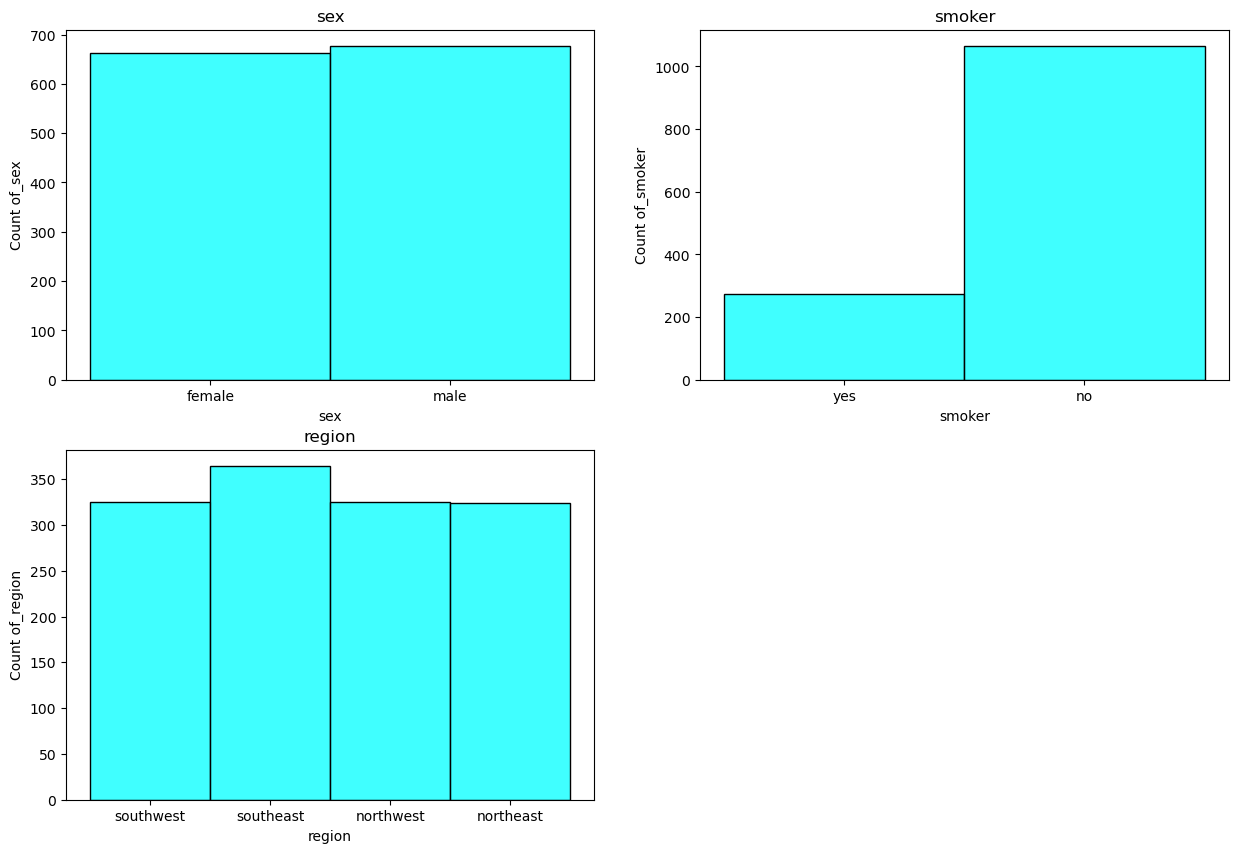

In [11]:
#visualizing the categorical 
cat_col = df_copy.select_dtypes(exclude='number')
list=cat_col.columns
plt.figure(figsize=(15,10))
for i in range(len(cat_col.columns)):
    plt.subplot(2,2,i+1)
    plt.title(list[i])
    plt.ylabel('Count of_'+ list[i])
    plt.xlabel(list[i])
    sns.histplot(data = df_copy,x=list[i],color='cyan')
plt.show()


In [12]:
#gender count
df_copy['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
# smoker count
df_copy['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
#regional count
df_copy['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

**Visualizing the numerical columns**

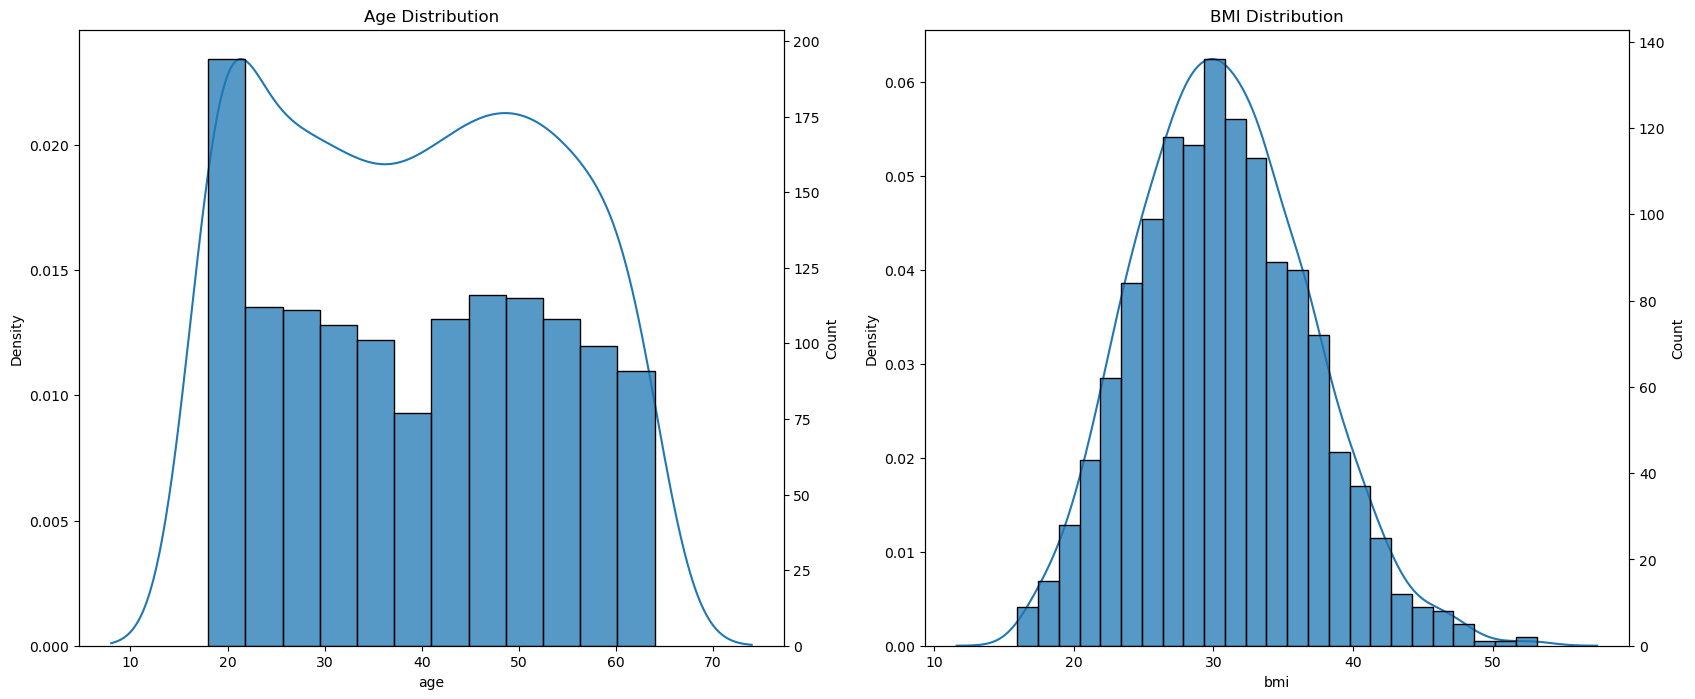

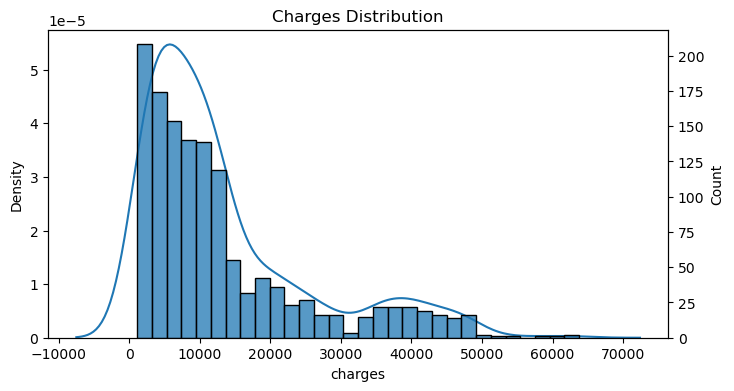

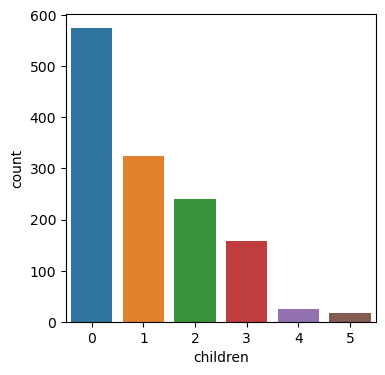

In [15]:
fig,ax =plt.subplots(1,2, figsize = (20,8))
sns.kdeplot(df_copy.age,ax=ax[0])
ax2=ax[0].twinx()
sns.histplot(df_copy.age,ax=ax2)
ax[0].set_title('Age Distribution')

sns.kdeplot(df_copy.bmi,ax=ax[1])
ax2=ax[1].twinx()
sns.histplot(df_copy.bmi,ax=ax2)
ax[1].set_title('BMI Distribution')

fig, ax = plt.subplots(figsize=(8,4))
sns.kdeplot(df_copy.charges,ax=ax)
ax2=ax.twinx()
sns.histplot(df_copy.charges,ax=ax2)
ax.set_title('Charges Distribution')

#distribution of 'children' column
plt.figure(figsize=(4,4))
sns.countplot(x='children', data=df_copy)
plt.show();

In [16]:
df_copy['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Person between 18 to 22 are years are more taking insurance.

person having zero childern are taking more insurance.

BMI is normally distributed between 10  to 50.

Count of taking insuarance which is of less costs/charges are more.

<Axes: title={'center': 'BMI vs Charges'}, xlabel='bmi', ylabel='charges'>

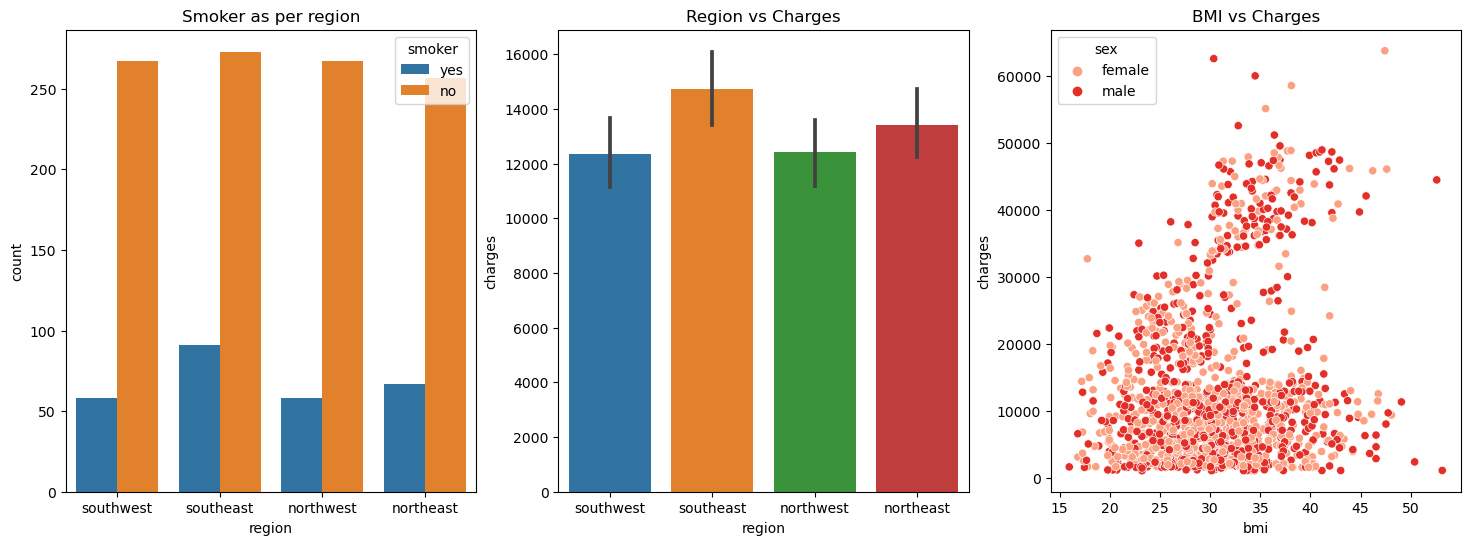

In [17]:
#counting smoker region wise

fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].set_title('Smoker as per region')
sns.countplot(data= df_copy,x=df_copy.region,hue=df_copy.smoker,ax=ax[0])

#To see outliers in charges column wrt to regions
ax[1].set_title('Region vs Charges')
sns.barplot(data=df_copy,y=df_copy.charges,x=df_copy.region,ax=ax[1])

ax[2].set_title('BMI vs Charges')
sns.scatterplot(x='bmi',y='charges',hue='sex', data=df_copy,palette='Reds',ax=ax[2])

South-East region has more smokers with respect to all regions.
    
South-East region has higher Insurance charges as compared to all other regions.

Charges for females as per bmi is mostly below 20K and on other hand charges for male are higher as per bmi.

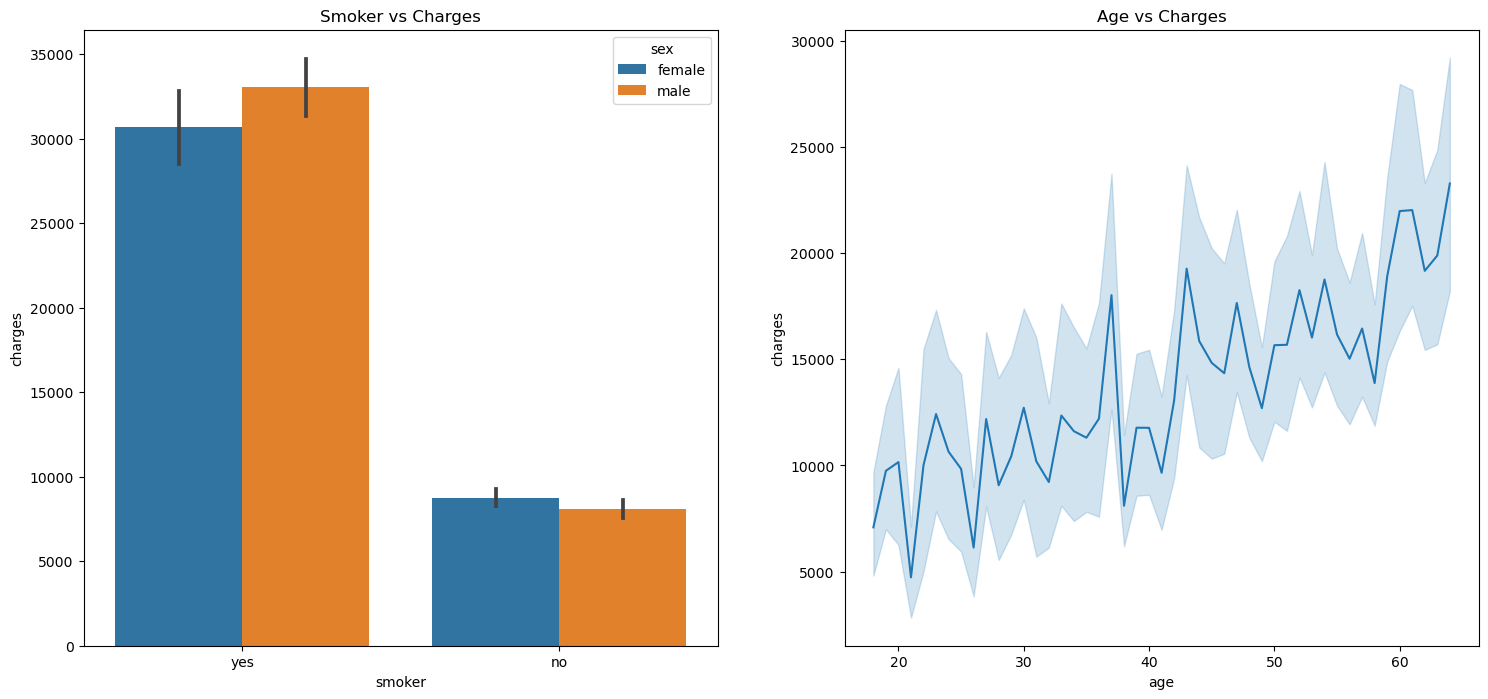

In [18]:
fig,ax =plt.subplots(1,2,figsize=(18,8))
ax[0].set_title('Smoker vs Charges')
sns.barplot(data=df_copy,x=df_copy.smoker,y=df_copy.charges,hue='sex',ax=ax[0])

ax[1].set_title('Age vs Charges')
sns.lineplot(data=df_copy,x=df.age,y=df.charges,ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels());

From above plot is clear that male and females which are smoker their charges are much higher as
compared to non-smokers.

We can see that the charges are increasing with age.

<Axes: title={'center': 'Checking Outlier in BMI'}, ylabel='bmi'>

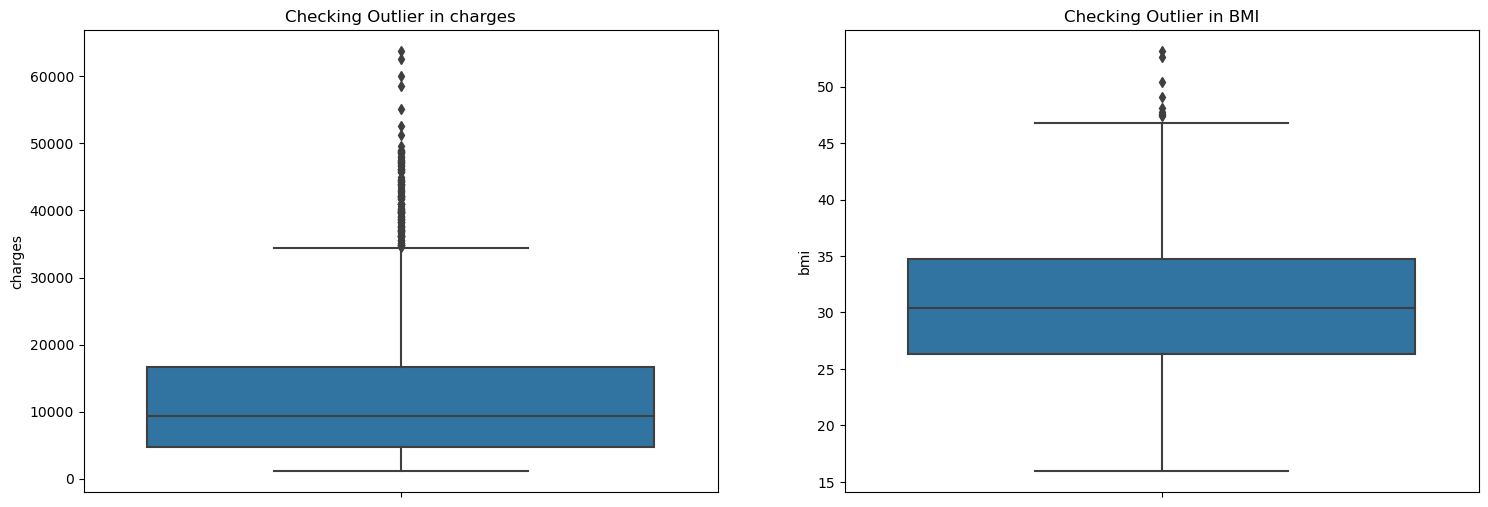

In [19]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
ax[0].set_title('Checking Outlier in charges')
sns.boxplot(data=df_copy,y=df_copy.charges,ax=ax[0])


#to see outliers in charges wrt to regions
ax[1].set_title('Checking Outlier in BMI')
sns.boxplot(data=df_copy,y=df_copy.bmi,ax=ax[1])


# Converting columns from string ['sex','smoker','region'] To Numerical Values

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder=LabelEncoder()
for i in cat_col.columns:
    df_copy[i+'_encoded'] = label_encoder.fit_transform(df_copy[i])
df_copy.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


As charges in are in thousand, ag and bmi are i ten's there is chance of skewness towards charges column.
So to get rid of biased towards one column we will scale it.

In [22]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaled_data = df_copy[['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded', 'charges']]
scaled_columns = ['scaled_age', 'scaled_bmi', 'scaled_children', 'scaled_sex', 'scaled_smoker', 'scaled_region', 'scaled_charges']

# Scale the data
scale = StandardScaler()
scaled_array = scale.fit_transform(scaled_data.to_numpy())

# Create a new DataFrame with the scaled data
scaled_data = pd.DataFrame(scaled_array, columns=scaled_columns)

# Display the first few rows of the scaled DataFrame
print(scaled_data.head())


   scaled_age  scaled_bmi  scaled_children  scaled_sex  scaled_smoker  \
0   -1.438764   -0.453320        -0.908614   -1.010519       1.970587   
1   -1.509965    0.509621        -0.078767    0.989591      -0.507463   
2   -0.797954    0.383307         1.580926    0.989591      -0.507463   
3   -0.441948   -1.305531        -0.908614    0.989591      -0.507463   
4   -0.513149   -0.292556        -0.908614    0.989591      -0.507463   

   scaled_region  scaled_charges  
0       1.343905        0.298584  
1       0.438495       -0.953689  
2       0.438495       -0.728675  
3      -0.466915        0.719843  
4      -0.466915       -0.776802  


In [23]:
#correlation Analysis of Features 
correlation_matrix = scaled_data.corr()
correlation_matrix

,scaled_age,scaled_bmi,scaled_children,scaled_sex,scaled_smoker,scaled_region,scaled_charges
scaled_age,1.000000,0.109272,0.042469,-0.020856,-0.025019,0.002127,0.299008
scaled_bmi,0.109272,1.000000,0.012759,0.046371,0.003750,0.157566,0.198341
scaled_children,0.042469,0.012759,1.000000,0.017163,0.007673,0.016569,0.067998
scaled_sex,-0.020856,0.046371,0.017163,1.000000,0.076185,0.004588,0.057292
scaled_smoker,-0.025019,0.003750,0.007673,0.076185,1.000000,-0.002181,0.787251
scaled_region,0.002127,0.157566,0.016569,0.004588,-0.002181,1.000000,-0.006208
scaled_charges,0.299008,0.198341,0.067998,0.057292,0.787251,-0.006208,1.000000


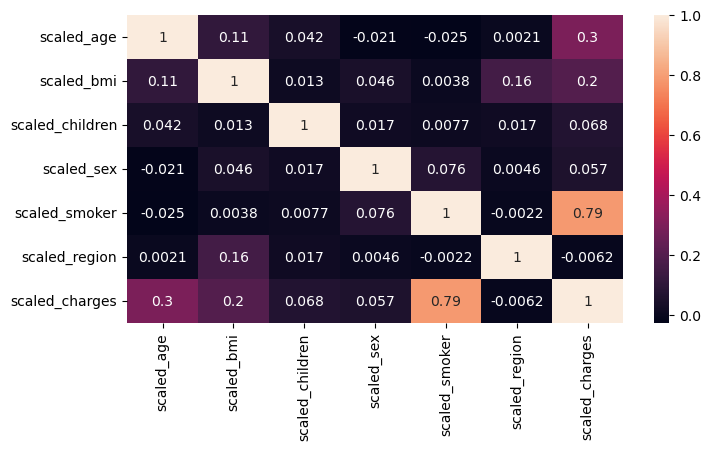

In [24]:
#plottingh correlation heatmap
plt.figure(figsize=(8,4))
sns.heatmap(scaled_data.corr(),annot=True);

In [25]:
X = scaled_data.drop(columns='scaled_charges',axis=1)
y = scaled_data[['scaled_charges']]

In [26]:
X.head()

,scaled_age,scaled_bmi,scaled_children,scaled_sex,scaled_smoker,scaled_region
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,1.343905
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,0.438495
2,-0.797954,0.383307,1.580926,0.989591,-0.507463,0.438495
3,-0.441948,-1.305531,-0.908614,0.989591,-0.507463,-0.466915
4,-0.513149,-0.292556,-0.908614,0.989591,-0.507463,-0.466915


In [27]:
y.head()

,scaled_charges
0,0.298584
1,-0.953689
2,-0.728675
3,0.719843
4,-0.776802


## Splitting data into train and test 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

print('size of X_train :', X_train.shape,'\nsize of y_train :', y_train.shape,'\nsize of X_test :',X_test.shape,'\nsize of y_test :',y_test.shape)

size of X_train : (936, 6) 
size of y_train : (936, 1) 
size of X_test : (402, 6) 
size of y_test : (402, 1)


# Linear Regression Model 

In [30]:
l_reg = LinearRegression()

#fitting model over data 
l_reg.fit(X_train,y_train)


LinearRegression()

In [31]:
cv_l_reg = cross_val_score(estimator = l_reg,X=X, y=y,cv=12)

#training score
y_pred_lr_train = l_reg.predict(X_train)
r2_score_lr_train = r2_score(y_train,y_pred_lr_train)

#testing score
y_pred_lr_test = l_reg.predict(X_test)
r2_score_lr_test = r2_score(y_test,y_pred_lr_test)

rmse_l_reg = (np.sqrt(mean_squared_error(y_test,y_pred_lr_test)))

print('CV Linear Regression : %0.3f'% cv_l_reg.mean())
print('R2_score (train)     : %0.3f'% r2_score_lr_train)
print('R2_score (test)      : %0.3f'% r2_score_lr_test)
print('RMSE                 : %0.3f'% rmse_l_reg)

CV Linear Regression : 0.738
R2_score (train)     : 0.738
R2_score (test)      : 0.778
RMSE                 : 0.469


## Ridge Regressor

In [32]:
steps = [('model', Ridge())]
pipeline = Pipeline(steps=steps)
parameters = {'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 2, 5, 10, 20, 25, 35, 43, 55,100]}
ridge_model = GridSearchCV(pipeline, parameters, cv=10)
ridge_model = ridge_model.fit(X_train, y_train)

In [33]:
ridge_model.best_estimator_,ridge_model.best_score_

(Pipeline(steps=[('model', Ridge(alpha=20))]), 0.7143936547566481)

In [34]:
ridge = Ridge(alpha=20, random_state=100)
ridge.fit(X_train, y_train)
cv_ridge = ridge_model.best_score_
# training score
y_pred_ridge_train= ridge.predict(X_train)
r2_score_ridge_train =r2_score(y_train,y_pred_ridge_train)
# testing score
y_pred_ridge_test= ridge.predict(X_test)
r2_score_ridge_test =r2_score(y_test,y_pred_ridge_test)
rmse_ridge_model =(np.sqrt(mean_squared_error(y_test,y_pred_ridge_test)))
print('CV Linear Regression :%0.3f'% cv_ridge.mean())
print('R2_score (train)     :%0.3f'% r2_score_ridge_train)
print('R2_score (test)      :%0.3f'% r2_score_ridge_test)
print('RMSE                 :%0.3f'%rmse_ridge_model)

CV Linear Regression :0.714
R2_score (train)     :0.737
R2_score (test)      :0.779
RMSE                 :0.468


## Support Vector Machine (Regression)

In [35]:
svr =SVR()

parameters ={'kernel': ['rbf','sigmoid'],
             'gamma': [0.001,0.01,0.1,1,'scale'],
             'tol' : [0.0001],
             'C' :[0.001,0.01,0.1,1,10,100] }

svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [36]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train, y_train)
print(svr_grid.best_estimator_)
cv_svr =svr_grid.best_score_

SVR(C=10, gamma=0.01, tol=0.0001)


In [37]:
# training score
y_pred_svr_train= svr.predict(X_train)
r2_score_svr_train =r2_score(y_train,y_pred_svr_train)
# testing score
y_pred_svr_test= svr.predict(X_test)
r2_score_svr_test =r2_score(y_test,y_pred_svr_test)
rmse_svr_model =(np.sqrt(mean_squared_error(y_test,y_pred_svr_test)))
print('CV Linear Regression :%0.3f'% cv_svr.mean())
print('R2_score (train)     :%0.3f'% r2_score_svr_train)
print('R2_score (test)      :%0.3f'% r2_score_svr_test)
print('RMSE                 :%0.3f'%rmse_svr_model)

CV Linear Regression :0.812
R2_score (train)     :0.851
R2_score (test)      :0.868
RMSE                 :0.362


## Random Forest Regressor

In [38]:
rf_model= RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
 'max_depth':[40,50,60],
 'min_samples_split': [5,7,9],
 'min_samples_leaf': [7,10,12],
 'criterion': ['friedman_mse']}
rf_grid = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=10, n_jobs=-1)
rf_grid = rf_grid.fit(X_train, y_train)


In [40]:
rf_grid.best_score_, rf_grid.best_estimator_

(0.8335101483771694,
 RandomForestRegressor(criterion='friedman_mse', max_depth=40,
                       min_samples_leaf=12, min_samples_split=7,
                       n_estimators=600))

In [65]:
rf_mod = RandomForestRegressor(max_depth=50, min_samples_leaf=15, min_samples_split=9,
 n_estimators=1200)
rf_mod.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=15, min_samples_split=9,
                      n_estimators=1200)

In [42]:
cv_rf = rf_grid.best_score_
# training score
y_pred_rf_train= rf_mod.predict(X_train)
r2_score_rf_train =r2_score(y_train,y_pred_rf_train)
# testing score
y_pred_rf_test= rf_mod.predict(X_test)
r2_score_rf_test =r2_score(y_test,y_pred_rf_test)
rmse_rf_model =(np.sqrt(mean_squared_error(y_test,y_pred_rf_test)))
print('CV Linear Regression :%0.3f'% cv_rf.mean())
print('R2_score (train) :%0.3f'% r2_score_rf_train)
print('R2_score (test) :%0.3f'% r2_score_rf_test)
print('RMSE :%0.3f'%rmse_rf_model)

CV Linear Regression :0.834
R2_score (train) :0.872
R2_score (test) :0.890
RMSE :0.330


# XGBoost regressor


In [52]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.7 MB/s eta 0:01:16
   ---------------------------------------- 0.1/124.9 MB 1.7 MB/s eta 0:01:14
   ---------------------------------------- 0.2/124.9 MB 1.7 MB/s eta 0:01:14
   ---------------------------------------- 0.2/124.9 MB 1.5 MB/s eta 0:01:23
   ---------------------------------------- 0.3/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.3/124.9 MB 1.2 MB/s eta 0:01:44
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:52
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:54
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:53
   -------------------

In [59]:
import xgboost as xgb
from sklearn import metrics



In [56]:
# Define the XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'max_depth': 3,
    'learning_rate': 0.1,
}

In [57]:
#Convert data into DMatrix format (optimized data structure for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [61]:
# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=30)
# Make predictions on the train set
y_train_pred = model.predict(dtrain)
# R2 value for train data
r2_train_xgb = metrics.r2_score(y_train, y_train_pred)
print('R2_score (train) : ', r2_train_xgb)
# Make predictions on the test set
y_pred = model.predict(dtest)
# R2 value for test data
r2_test_xgb = metrics.r2_score(y_test, y_pred)
print('R2_score (test): ', r2_test_xgb)


R2_score (train) :  0.8627281201971496
R2_score (test):  0.894585830776571


In [46]:
models= [('Linear Regression',cv_l_reg.mean(),r2_score_lr_train,r2_score_rf_test,rmse_l_reg),
         ('Support Vector Regression',cv_svr.mean(),r2_score_svr_train,r2_score_svr_test,rmse_svr_model),
         ('Ridge Regressor',cv_ridge.mean(),r2_score_ridge_train,r2_score_ridge_test,rmse_ridge_model),
         ('Random Forest Regressor',cv_rf.mean(),r2_score_rf_train,r2_score_rf_test,rmse_rf_model)]
         


In [48]:
df_1 = pd.DataFrame(data=models, columns=['Model','Cross-Validation','R2_Score(training)','R2_Score(test)','RMSE'])
df_1

,Model,Cross-Validation,R2_Score(training),R2_Score(test),RMSE
0,Linear Regression,0.737515,0.737770,0.889933,0.468691
1,Support Vector Regression,0.812452,0.851166,0.867954,0.361710
2,Ridge Regressor,0.714394,0.737429,0.778579,0.468389
3,Random Forest Regressor,0.833510,0.871580,0.889933,0.330237


In [62]:
from joblib import dump,load
# Saving our model 
dump(rf_model,'rf_model.joblib')
# Loading the model back
rf_model_loaded=load('rf_model.joblib')

In [63]:
rf_model_loaded

RandomForestRegressor()